<h1>Multiple Linear Regression</h1>


In [37]:
from torch import nn
import torch

In [38]:
# Set the weight and bias

w = torch.tensor([[2.0], [3.0]], requires_grad=True)
b = torch.tensor([[1.0]], requires_grad=True)

# Define Prediction Function

def forward(x):
    yhat = torch.mm(x, w) + b
    return yhat

In [39]:
# Calculate yhat
x = torch.tensor([[1.0, 2.0]])
yhat = forward(x)
print("The result: ", yhat)


# Sample tensor X
X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])
# Make the prediction of X 
yhat = forward(X)
print("The result: ", yhat)

The result:  tensor([[9.]], grad_fn=<AddBackward0>)
The result:  tensor([[ 6.],
        [ 9.],
        [12.]], grad_fn=<AddBackward0>)


In [40]:
# Make a linear regression model using build-in function
model = nn.Linear(2, 1)


# Make a prediction of x
yhat = model(x)
print("The result: ", yhat)


# Make a prediction of X (with multiple samples)
yhat = model(X)
print("The result: ", yhat)

The result:  tensor([[1.7747]], grad_fn=<AddmmBackward>)
The result:  tensor([[1.3791],
        [1.7747],
        [2.1703]], grad_fn=<AddmmBackward>)


<h2 id="Cust">Build Custom Modules </h2>

In [41]:
# Create linear_regression Class

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [42]:
model = linear_regression(2, 1)

# Print model parameters
print("The parameters: ", list(model.parameters()))
#we can also use .state_dict() to print model parameters
print("The parameters: ", model.state_dict())

The parameters:  [Parameter containing:
tensor([[0.1712, 0.4041]], requires_grad=True), Parameter containing:
tensor([-0.4603], requires_grad=True)]
The parameters:  OrderedDict([('linear.weight', tensor([[0.1712, 0.4041]])), ('linear.bias', tensor([-0.4603]))])


In [43]:
# Make a prediction of x
yhat = model(x)
print("The result: ", yhat)

#Make a prediction of X
yhat = model(X)
print("The result: ", yhat)

The result:  tensor([[0.5192]], grad_fn=<AddmmBackward>)
The result:  tensor([[0.1151],
        [0.5192],
        [0.9233]], grad_fn=<AddmmBackward>)


<h1>Linear Regression Multiple Outputs</h1> 

In [44]:
# Import the libraries we need for this lab

from torch import nn,optim
import torch
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader

In [45]:
# The function for plotting 2D

def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = data_set.x[:, 0].view(-1, 1).numpy()
    x2 = data_set.x[:, 1].view(-1, 1).numpy()
    y = data_set.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot
    
    ax.plot_surface(X, Y, yhat) # Plane plot
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

In [46]:
# Create a 2D dataset

class Data2D(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b    
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):          
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [47]:
# Create the dataset object

data_set = Data2D()

In [48]:
# Create a customized linear

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [49]:
# Create the linear regression model and print the parameters

model = linear_regression(2,1)
print("The parameters: ", list(model.parameters()))

The parameters:  [Parameter containing:
tensor([[ 0.0563, -0.6668]], requires_grad=True), Parameter containing:
tensor([-0.1438], requires_grad=True)]


In [50]:
# Create the optimizer

optimizer = optim.SGD(model.parameters(), lr=0.1)

# Create the cost function

criterion = nn.MSELoss()


# Create the data loader

train_loader = DataLoader(dataset=data_set, batch_size=2)

Before Training: 


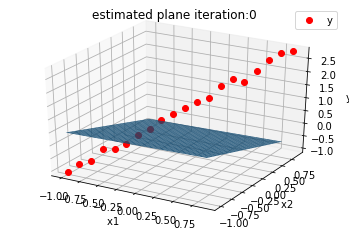

After Training: 


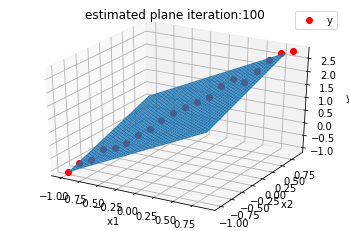

In [51]:
# Train the model

LOSS = []
print("Before Training: ")
Plot_2D_Plane(model, data_set)   
epochs = 100
   
def train_model(epochs):    
    for epoch in range(epochs):
        for x,y in train_loader:
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()     
train_model(epochs)
print("After Training: ")
Plot_2D_Plane(model, data_set, epochs)  

Text(0, 0.5, 'Cost/total loss ')

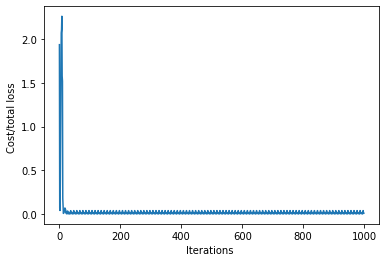

In [52]:
# Plot out the Loss and iteration diagram

plt.plot(LOSS)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss ")

<h1 align=center><font size = 5>Linear Regression with Multiple Outputs </font></h1> 

In [53]:
from torch import nn
import torch

In [54]:
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        yhat=self.linear(x)
        return yhat

In [55]:
model=linear_regression(1,10)
model(torch.tensor([1.0]))

tensor([-0.4502, -0.1663, -0.9671,  0.3515,  1.5505,  0.9661, -0.5965, -1.0287,
         0.3121, -0.1266], grad_fn=<AddBackward0>)

In [56]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.6949],
         [ 0.5002],
         [-0.1822],
         [ 0.2435],
         [ 0.7219],
         [ 0.3183],
         [ 0.0442],
         [-0.2807],
         [-0.5346],
         [-0.5013]], requires_grad=True), Parameter containing:
 tensor([ 0.2447, -0.6664, -0.7848,  0.1080,  0.8286,  0.6479, -0.6407, -0.7480,
          0.8466,  0.3747], requires_grad=True)]

In [57]:
x=torch.tensor([[1.0],[3.0]])
yhat=model(x)
yhat

tensor([[-0.4502, -0.1663, -0.9671,  0.3515,  1.5505,  0.9661, -0.5965, -1.0287,
          0.3121, -0.1266],
        [-1.8401,  0.8341, -1.3315,  0.8386,  2.9943,  1.6027, -0.5081, -1.5901,
         -0.7571, -1.1293]], grad_fn=<AddmmBackward>)

In [58]:
X=torch.tensor([[1.0],[2.0],[3.0]])
Yhat=model(X)
Yhat

tensor([[-0.4502, -0.1663, -0.9671,  0.3515,  1.5505,  0.9661, -0.5965, -1.0287,
          0.3121, -0.1266],
        [-1.1451,  0.3339, -1.1493,  0.5950,  2.2724,  1.2844, -0.5523, -1.3094,
         -0.2225, -0.6280],
        [-1.8401,  0.8341, -1.3315,  0.8386,  2.9943,  1.6027, -0.5081, -1.5901,
         -0.7571, -1.1293]], grad_fn=<AddmmBackward>)

<h1 align=center><font size = 5>Linear Regression Multiple Outputs</font></h1> 

In [59]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [60]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
            self.x=torch.zeros(20,2)
            self.x[:,0]=torch.arange(-1,1,0.1)
            self.x[:,1]=torch.arange(-1,1,0.1)
            self.w=torch.tensor([ [1.0,-1.0],[1.0,3.0]])
            self.b=torch.tensor([[1.0,-1.0]])
            self.f=torch.mm(self.x,self.w)+self.b
            
            self.y=self.f+0.001*torch.randn((self.x.shape[0],1))
            self.len=self.x.shape[0]

    def __getitem__(self,index):

        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

In [61]:
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        yhat=self.linear(x)
        return yhat

criterion = nn.MSELoss()

In [62]:
data_set=Data()
model=linear_regression(2,2)
ptimizer = optim.SGD(model.parameters(), lr = 0.1)
train_loader=DataLoader(dataset=data_set,batch_size=5)

In [63]:
LOSS=[]
 
epochs=100
   
for epoch in range(epochs):
    for x,y in train_loader:
        #make a prediction 
        yhat=model(x)
        #calculate the loss
        loss=criterion(yhat,y)
        #store loss/cost 
        LOSS.append(loss.item())
        #clear gradient 
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()

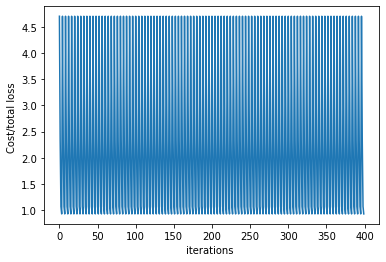

In [64]:
plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()